# Problem Statement(Case Study)

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# Import Necessary Libraries

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [177]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Exploratory Data Analaysis

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


As we can see the total dataset has the continuos values so this comes under the regression problem statement

#### lets drop the unamed column from the dataset as it is of no use

In [179]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Now the data is present in the good Format

#### Check any null values in the dataframe

In [180]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

##### Visualisation

<AxesSubplot:>

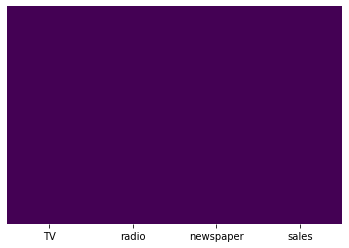

In [181]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### We can see there are no null values present in the dataset

In [182]:
df.shape

(200, 4)

In [183]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

#### we have 200 rows and 4 columns,and the column names are
    - TV
    - radio
    - newspaper
    - sales


In [184]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### As per the above results we can say the below points
- The highest mean values is for TV and has good effect on sales.
- For Tv and radio there is no much difference in mean and 50th percentile,so we can say there is no scope of outliers
- Newspaper has some difference b/w mean and 50th percentile, we can assume there might be some outliers
- as we know the count is 200 for all that means no null values

# Visualising the data

#### Firstly lets see any unique values present in the columns of the dataset

In [185]:
df['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

There are no unique values present in the dataset for TV column

In [186]:
df['radio'].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

There are no unique values present in the dataset for radio column

In [187]:
df['newspaper'].unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

There are no unique values present in the dataset for newspaper column

#### As the advertising on TV is increasing the sales are also increasing

<AxesSubplot:xlabel='TV', ylabel='sales'>

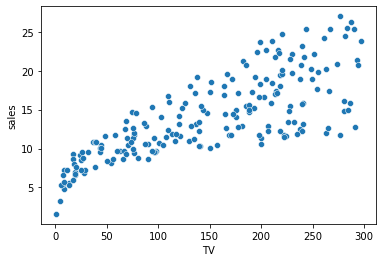

In [188]:
sns.scatterplot(data=df, x="TV", y="sales")

#### The values are more spreaded here

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

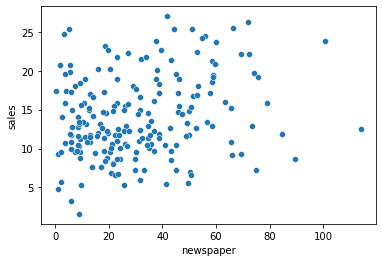

In [189]:
sns.scatterplot(data=df, x="newspaper", y="sales")

#### The values are incresing and spreaded at the same time

<AxesSubplot:xlabel='radio', ylabel='sales'>

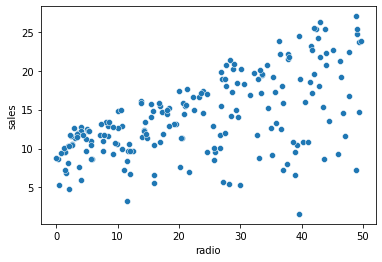

In [190]:
sns.scatterplot(data=df, x="radio", y="sales")

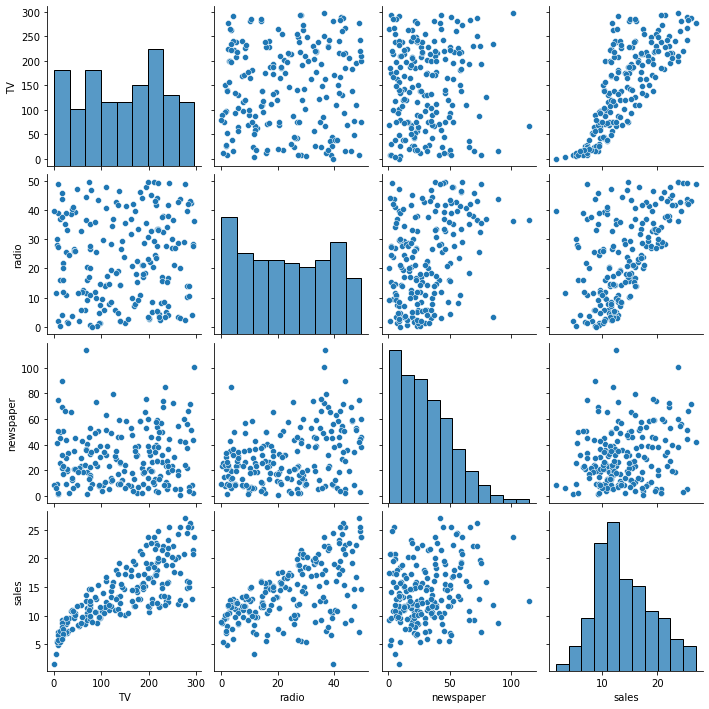

In [191]:
sns.pairplot(df, size=2.5)
plt.show()

- Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.
- There is no correlation seems between all features.

# Finding the Correlation 

<AxesSubplot:>

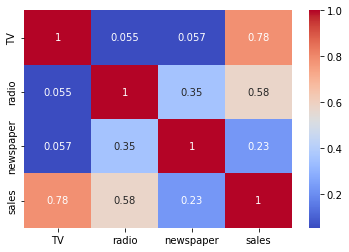

In [192]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

#### From the HeatMap we noted that sales correlation with population as 
- Target variable sales are highly correlated with TV.
- moderately correlated with radio. 
- less correlated with newspaper.

### Visualising the correlation using boxplot

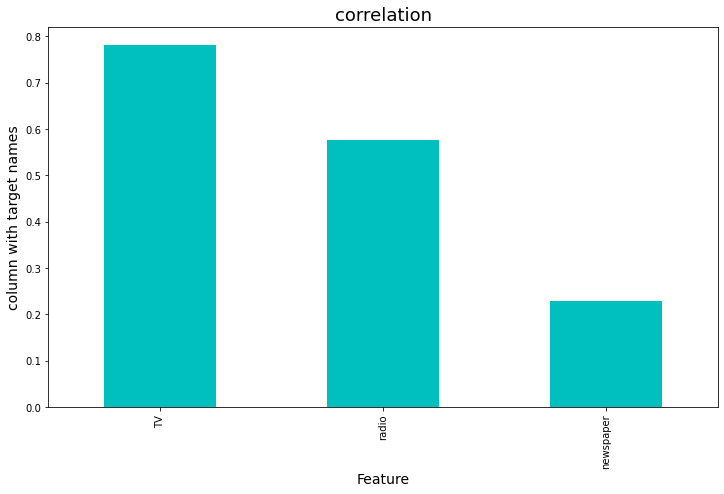

In [193]:
plt.figure(figsize=(12,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

#### Outliers are present in newpapers column which is negligible

TV              AxesSubplot(0.125,0.125;0.110714x0.755)
radio        AxesSubplot(0.257857,0.125;0.110714x0.755)
newspaper    AxesSubplot(0.390714,0.125;0.110714x0.755)
sales        AxesSubplot(0.523571,0.125;0.110714x0.755)
dtype: object

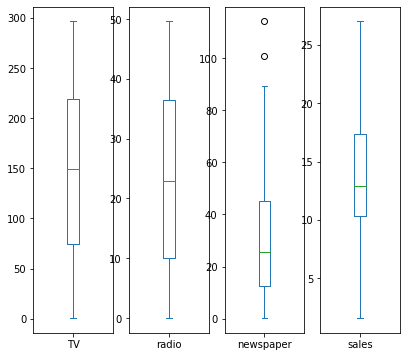

In [194]:
df.plot(kind='box',subplots=True,layout=(1,6),figsize=(10,6))

# Removing outliers using z-score method

In [195]:
newpaper_feature = df[["newspaper"]]
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(newpaper_feature))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [196]:
new_df.shape

(198, 4)

In [197]:
print(f'we have loss of {(200-198)/200*100}')

we have loss of 1.0


# Checking for skewness

In [198]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

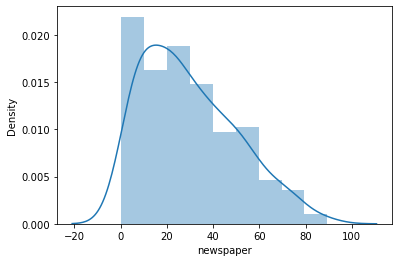

In [199]:
sns.distplot(new_df["newspaper"])

Newpaper column has little left skewed data 

<AxesSubplot:xlabel='TV', ylabel='Density'>

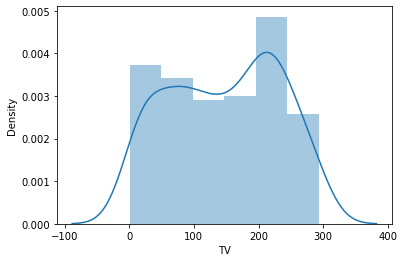

In [200]:
sns.distplot(new_df["TV"])

TV column has normally distributed with some little skewness

<AxesSubplot:xlabel='radio', ylabel='Density'>

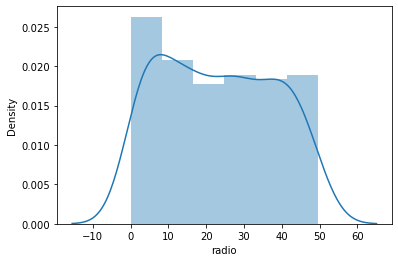

In [201]:
sns.distplot(new_df["radio"])

Radio data has been normally distibuted

#### removing the skewness which is having more impact in my case it is newspaper feature

In [202]:
#skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
new_df[["newspaper"]]=pt.fit_transform(new_df[["newspaper"]])
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

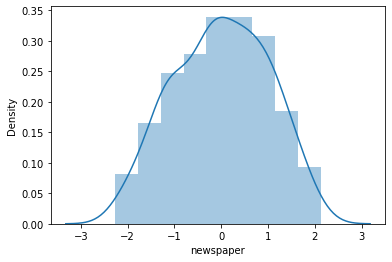

In [203]:
sns.distplot(new_df["newspaper"])

now the data is normally distributed for newspaper feature

# DATA PREPROCESSING

In [204]:
x = new_df.drop("sales", axis=1)
y = new_df["sales"]

# Scaling with standarad scalar

In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


In [206]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
def model_predictor(model):
    model.fit(x_train,y_train)
    print('Accuracy : ', model.score(x_test,y_test))
    score = cross_val_score(model,x,y, cv=5)
    print(score)
    print('CV Score : ', np.mean(score))

# Linear Regression

In [207]:
from sklearn.linear_model import LinearRegression
# Getting Accuracy of and cv score of the model
LR = LinearRegression()
model_predictor(LR)
# Checking r2score for Linear Regression
# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

Accuracy :  0.8782031935095681
[0.8791904  0.91752126 0.9257283  0.81085619 0.89557353]
CV Score :  0.8857739370001966
R2_score: 0.8782031935095681


# Ridge Regression

In [208]:
from sklearn.linear_model import Ridge
# Getting Accuracy of and cv score of the model
rdge = Ridge(alpha=0.1)
model_predictor(rdge)
# Checking r2score for Linear Regression
# prediction
pred_rdge=rdge.predict(x_test)
print('R2_score:',r2_score(y_test,pred_rdge))

Accuracy :  0.8780551722296199
[0.87920227 0.91747425 0.92584304 0.81079596 0.89561369]
CV Score :  0.8857858441293963
R2_score: 0.8780551722296199


# Decision Tree Regressor

In [209]:
from sklearn.tree import DecisionTreeRegressor
# Getting Accuracy of and cv score of the model
DTR = DecisionTreeRegressor()
model_predictor(DTR)
# Checking r2score for Linear Regression
# prediction
predDTR=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,predDTR))

Accuracy :  0.9485825715640342
[0.96719116 0.95107793 0.94185219 0.93864583 0.96282265]
CV Score :  0.9523179530542196
R2_score: 0.9485825715640342


# Random Forest Regressor

In [210]:
from sklearn.ensemble import RandomForestRegressor
# Getting Accuracy of and cv score of the model
RFR = RandomForestRegressor()
model_predictor(RFR)
# Checking r2score for Linear Regression
# prediction
predRFR=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,predRFR))

Accuracy :  0.9862168830802168
[0.98050706 0.98116081 0.97635634 0.96021584 0.980851  ]
CV Score :  0.975818207666555
R2_score: 0.9862168830802168


# KNeighborsRegressor

In [211]:
from sklearn.neighbors import KNeighborsRegressor
# Getting Accuracy of and cv score of the model
KNR = KNeighborsRegressor()
model_predictor(KNR)
# Checking r2score for Linear Regression
# prediction
predKNR=KNR.predict(x_test)
print('R2_score:',r2_score(y_test,predKNR))

Accuracy :  0.8872249038930795
[0.94230691 0.95646765 0.95594361 0.8697193  0.94677589]
CV Score :  0.9342426712595204
R2_score: 0.8872249038930795


# Support Vector Regressor

In [212]:
from sklearn.svm import SVR
# Getting Accuracy of and cv score of the model
suprt_vctr_reg = SVR()
model_predictor(suprt_vctr_reg)
# Checking r2score for Linear Regression
# prediction
predSVR=suprt_vctr_reg.predict(x_test)
print('R2_score:',r2_score(y_test,predSVR))

Accuracy :  0.8509354985838621
[0.89025615 0.94250487 0.96185506 0.80433854 0.91918325]
CV Score :  0.9036275725678571
R2_score: 0.8509354985838621


# AS WE HAVE TRAINED OUR MODEL WITH DIFFERENT ALGORITHMS THE BEST SUITED IS RANDOM FOREST REGRESSOR

### lets train the model with full data

In [213]:
# model = RandomForestRegressor()
# model.fit(x,y)

In [214]:
# randm_frst_pred = model.predict(x_test)

In [215]:

from sklearn.metrics import mean_squared_error

Add_sales = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
Add_sales.fit(x_train, y_train)
pred = Add_sales.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.6296123886964115
R2_Score: 98.41291999781731


### Saving the model

In [216]:
import joblib
joblib.dump(model,"advertising_sales.pkl")

['advertising_sales.pkl']

### Loading the model

In [217]:
loadmodel = joblib.load('advertising_sales.pkl')

In [218]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,9.5,9.038
1,12.2,12.696
2,24.4,23.843
3,10.4,10.512
4,7.3,6.763
5,24.7,24.247
6,20.1,19.836
7,11.9,12.190
8,14.6,14.901
9,15.0,14.873
